<h1><center> Dimensionality Reduction

<div class="alert alert-success">
Dimensionality reduction is the process of transforming a dataset to a lower dimensional space. 
</div>

<div class="alert alert-info">
Link: https://en.wikipedia.org/wiki/Dimensionality_reduction
</div>

In [3]:
# Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
# Create some random, correlated, data
means = [50, 50]
covs = [[1, .75], [.75, 1]]
n = 1000

dat = np.random.multivariate_normal(means, covs, n)

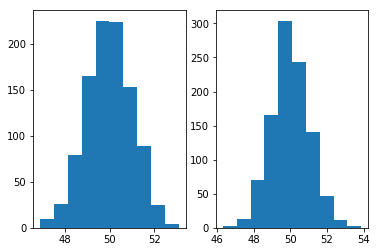

In [5]:
# Plot our two random variables
f, ax = plt.subplots(1, 2)
ax[0].hist(dat[:, 0]);
ax[1].hist(dat[:, 1]);

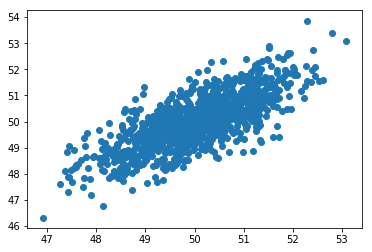

In [6]:
# Check out how the data relates to each other
plt.scatter(dat[:, 0], dat[:, 1])

## Task:

For some reason, we want/need lower dimensional data for some further analysis. Instead of simply choosing a subset of dimensions though, dimensionality reduction is the process of trying to capture the most information from the original space, in a smaller number of dimensions.

Note: here we are going from 2D -> 1D for simplicity, and convenience. In practice is most useful when you have an intractably large number of dimensions, say 20,000, and want to transform the data into a lower dimensional space (that captures the most information you can), but is much more manageable, containing, perhaps closer to 20 dimensions. 

Here we will use Principal Components Analysis (PCA) for dimensionality reduction. For more information on what PCA is and how it works, see the lecture. 

In [13]:
# Initialize the PCA model, here specifying 1 component
pca = PCA(n_components=1, whiten=True)

In [14]:
# Fit the PCA model, and apply it to transform the data
out = pca.fit_transform(dat)

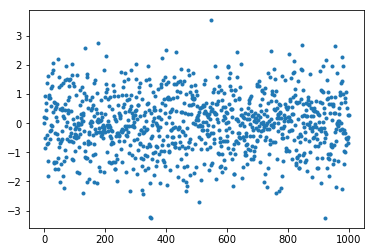

In [15]:
# Check out the transformed data, in the new space
#  Note: since the new data is 1D, the x-axis here is just index number
plt.plot(out, '.')